In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 붓꽃 데이터 로딩하고 학습과 테스트 데이터 세트로 분리

iris_data = load_iris()
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 11)


print(iris_data.feature_names)
print(iris_data.target_names)

dt_clf=DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state=156)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [15]:
# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)
y_hat = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_hat)
print("예측 정확도 : {:.4f}".format(accuracy))

예측 정확도 : 0.9333


* DT 파라미터
    * max_depth..

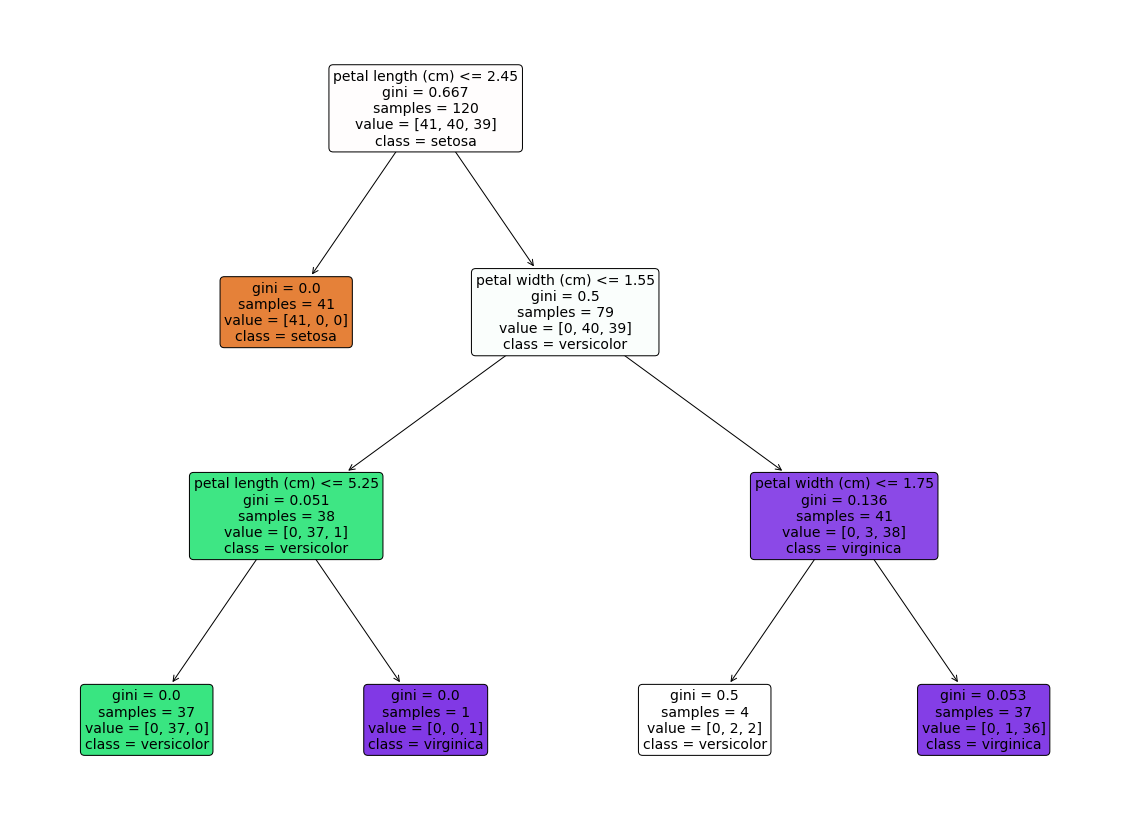

In [16]:
# DT (Decision Tree) 시각화
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (20,15))
tree.plot_tree(dt_clf, filled = True, feature_names = iris_data.feature_names, class_names = iris_data.target_names, 
               rounded=True, fontsize=14)
plt.show()
plt.close()

In [22]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=11)
# X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 11)

rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)


print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

RandomForestClassifier 정확도:0.9333


In [23]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()

lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)


print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

LogisticRegression 정확도: 0.9333


### SVM, KNN함

In [37]:
t_df = pd.read_pickle('D:/workspace/20201107/dataset-20201107T042837Z-001/dataset/t_df.pkl')
t_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,7,3
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,7,3
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,7,3


In [38]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 분리
X = t_df.drop("Survived", axis = 1)
y = t_df['Survived']

# 독립변수 정규화 (평균 0, 분산 1인 표준정규분포)
X = preprocessing.StandardScaler().fit(X).transform(X)

# 학습용, 평가용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)
print(X.mean())
print(X.std())

7.476249324075128e-18
1.0


### KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

k_model = KNeighborsClassifier(n_neighbors=5)
k_model.fit(X_train, y_train)
k_pred = k_model.predict(X_test)

k_accuracy = accuracy_score(y_test, k_pred)
print("예측 정확도 : ", k_accuracy)

예측 정확도 :  0.8156424581005587


### SVM

In [46]:
from sklearn import svm
svm_model = svm.SVC(kernel ='rbf', random_state = 0)
svm_model.fit(X_train, y_train)

s_pred = svm_model.predict(X_test)
s_accuracy=accuracy_score(y_test, s_pred)

print('s 정확도:', s_accuracy)

s 정확도: 0.8435754189944135


### 평가
* ML 성능평가지표는 일반적으로 모델이 분류냐 회귀냐에 따라 여러졸유로 구분
* 회귀의 경우 실제값과 예측값의 오차 평균값에 기반
* 분류의 경우도 실제 결과 데이터와 예측 결과 데이터가 얼마나 정확하고 오류가 적게 발생하는가에 기반하지만 이러한 정확도만 가지고 판단했다가는 잘못된 평가 결과에 빠질 수 있으며 정확도 외에 오차행렬, 정밀고, 재현율, F1스코어 ROC AUC와 같은 평과지표를 같이 고려해서 수행하는 것이 필요함

In [75]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
t_df = pd.read_pickle('D:/workspace/20201107/dataset-20201107T042837Z-001/dataset/t_df.pkl')

X = t_df.drop("Survived", axis = 1)
y = t_df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print("오차행렬")
    print(confusion)
    print("정확도: {0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}".format(accuracy, precision, recall, f1))

In [77]:
get_clf_eval(y_test, dt_pred)

오차행렬
[[98 20]
 [18 43]]
정확도: 0.7877, 정밀도:0.6825, 재현율:0.7049, F1:0.6935


In [78]:
accuracy = (98+43)/(98+20+18+43)
precision = 43/(20+43)
recall = 43/(18+43)
f1 = 2*(0.6825 * 0.7049)/(0.6825 + 0.7049)
print(accuracy)
print(precision)
print(recall)
print(f1)

0.7877094972067039
0.6825396825396826
0.7049180327868853
0.6935191725529768


In [79]:
# Q, lr, rf 기반으로 타이타닉 생존자 예측하고 
# confusion matrix, accuracy, precision, recall 평가 수행

### Linear Regression - 타이타닉 생존자

In [98]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
lr_clf = pd.read_pickle('D:/workspace/20201107/dataset-20201107T042837Z-001/dataset/t_df.pkl')

X = lr_clf.drop("Survived", axis = 1)
y = lr_clf["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 9)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

def get_lr_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print("오차행렬")
    print(confusion)
    print("정확도: {0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}".format(accuracy, precision, recall, f1))

In [102]:
get_lr_clf_eval(y_test, lr_pred)

오차행렬
[[84 16]
 [28 51]]
정확도: 0.7542, 정밀도:0.7612, 재현율:0.6456, F1:0.6986


### Random Forest - 타이타닉 생존자

In [115]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
rf_clf = pd.read_pickle('D:/workspace/20201107/dataset-20201107T042837Z-001/dataset/t_df.pkl')

X = rf_clf.drop("Survived", axis = 1)
y = rf_clf["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 9)

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

def get_rf_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print("오차행렬")
    print(confusion)
    print("정확도: {0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}"
          .format(accuracy, precision, recall, f1, roc_auc))

In [116]:
get_rf_clf_eval(y_test, rf_pred)

오차행렬
[[85 15]
 [26 53]]
정확도: 0.7709, 정밀도:0.7794, 재현율:0.6709, F1:0.7211, AUC:0.7604


In [112]:
from sklearn.metrics import roc_auc_score

pred = lr_clf.predict(X_test)
roc_score = roc_auc_score(y_test,pred)
print("ROC AUC 값 : {0:.4f}".format(roc_score))

ROC AUC 값 : 0.7428
